In [12]:
!pip install progressbar2

vaex-astro 0.1.5 requires kapteyn, which is not installed.
notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from random import shuffle
import progressbar
def load_data():
    
    path = 'dataset2'
    pctr1 = os.path.join(path,'data3_class1.npy')
    pctr2 = os.path.join(path,'data3_class2.npy')
    pctr3 = os.path.join(path,'data3_class3.npy')
    pcte1 = os.path.join(path,'data3_test1.npy')
    pcte2 = os.path.join(path,'data3_test2.npy')
    pcte3 = os.path.join(path,'data3_test3.npy')
    
    
    train1 = np.load(pctr1)
    train2 = np.load(pctr2)
    train3 = np.load(pctr3)
    test1 = np.load(pcte1)
    test2 = np.load(pcte2)
    test3 = np.load(pcte3)
    
    return train1, train2, train3, test1, test2, test3

In [14]:
def get_predictions(x, mu, cov, pi, prior):
    sum_g = np.ndarray(shape=(x.shape[0],1),dtype=float)
    for i in range(x.shape[0]):
        for j in range(1):
            sum_g[i][j]=0
    l = len(cov)
    for i in range(l):
        I = np.identity(cov[i].shape[0], dtype=float)
        p = 1e-2
        I = p*I
        cov[i]+=I
        temp = pi[i]*(np.linalg.det(cov[i])**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu[i],np.matmul(np.linalg.inv(cov[i]),(x- mu[i]).T).T))
        temp = np.reshape(temp,(x.shape[0],1))
        sum_g+=temp
    return sum_g*prior

In [15]:
def get_confusion_mat(c1, c2, c3, classes):
    
    lis = []
    if(c3!=0):
        conf_mat = np.full((3,3),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(c3):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [16]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [17]:
def find_range(data1, data2, test1, test2):
    
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(test1[:,0]))
    minx = min(minx, np.min(test2[:,0]))
    
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(test1[:,1]))
    miny = min(miny, np.min(test2[:,1]))
   
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(test1[:,0]))
    maxx = max(maxx, np.max(test2[:,0]))
    
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(test1[:,1]))
    maxy = max(maxy, np.max(test2[:,1]))
    
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

def find_range3(data1, data2, data3, test1, test2, test3):
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))
    minx = min(minx, np.min(test1[:,0]))
    minx = min(minx, np.min(test2[:,0]))
    minx = min(minx, np.min(test3[:,0]))
    
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))
    miny = min(miny, np.min(test1[:,1]))
    miny = min(miny, np.min(test2[:,1]))
    miny = min(miny, np.min(test3[:,1]))
   
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))
    maxx = max(maxx, np.max(test1[:,0]))
    maxx = max(maxx, np.max(test2[:,0]))
    maxx = max(maxx, np.max(test3[:,0]))
    
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    maxy = max(maxy, np.max(test1[:,1]))
    maxy = max(maxy, np.max(test2[:,1]))
    maxy = max(maxy, np.max(test3[:,1]))
    
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

In [18]:
def pair_plot(test1, test2, dc1, dc2, mu1, cov1, pi1, mu2, cov2, pi2, il, jl,k):
    le1 = dc1.shape[0]
    le2 = dc2.shape[0]
    le  = le1+le2
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    data=[]
    minx, miny, maxx,maxy = find_range(dc1, dc2, test1, test2)
    print(minx, maxx, miny, maxy)
    for i in progressbar.progressbar(np.arange(minx,maxx,1)):
        for j in np.arange(miny,maxy,1):
            data.append(np.array([i,j]))
    data=np.array(data)
    
    g1 = get_predictions(data, mu1, cov1, pi1, le1/le)
    g2 = get_predictions(data, mu2, cov2, pi2, le2/le)
    for i in progressbar.progressbar(range(data.shape[0])):
            if(np.argmax([g1[i][0],g2[i][0]])==0):
                dat_red.append([data[i][0],data[i][1]])
            elif(np.argmax([g1[i][0],g2[i][0]])==1):
                dat_blue.append([data[i][0],data[i][1]])
                
  
    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
    if(len(dat_blue)!=0):
        ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    if(len(dat_red)!=0):
        ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()

    
    data_test = []
    g1 = []
    g2 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]

    p1 = get_predictions(test1, mu1, cov1, pi1, le1/le)
    p2 = get_predictions(test1, mu2, cov2, pi2, le2/le)
    for i in progressbar.progressbar(range(lw1)):
        g1.append(p1[i][0])
        g2.append(p2[i][0])
    p1 = get_predictions(test2, mu1, cov1, pi1, le1/le)
    p2 = get_predictions(test2, mu2, cov2, pi2, le2/le)
    for i in progressbar.progressbar(range(lw2)):
        g1.append(p1[i][0])
        g2.append(p2[i][0])


    classes = []
    lw = lw1+lw2
    for i in progressbar.progressbar(range(lw)):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(lw1, lw2, 0, classes)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [19]:
def total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, pi2, mu3, cov3, pi3,k):
    le1 = train1.shape[0]
    le2 = train2.shape[0]
    le3 = train3.shape[0]
    le  = le1+le2+le3
    dat_blue = []
    dat_red = []
    dat_green = []
    violet_patch = mpatches.Patch(color='violet', label='class1')
    pink_patch = mpatches.Patch(color='pink', label='class2')
    oldlace_patch = mpatches.Patch(color='oldlace', label='class3')
    
    minx, miny, maxx, maxy = find_range3(train1, train2, train3, test1, test2, test3)
    data=[]
    for i in progressbar.progressbar(np.arange(minx,maxx,1)):
        for j in np.arange(miny,maxy,1):
            data.append(np.array([i,j]))
    data=np.array(data)
    
    g1 = get_predictions(data, mu1, cov1, pi1, le1/le)
    g2 = get_predictions(data, mu2, cov2, pi2, le2/le)
    g3 = get_predictions(data, mu3, cov3, pi3, le3/le)
   
    for i in progressbar.progressbar(range(data.shape[0])):
            if(np.argmax([g1[i][0],g2[i][0],g3[i][0]])==0):
                dat_red.append([data[i][0],data[i][1]])
            elif(np.argmax([g1[i][0],g2[i][0],g3[i][0]])==1):
                dat_blue.append([data[i][0],data[i][1]])
            elif(np.argmax([g1[i][0],g2[i][0],g3[i][0]])==2):
                dat_green.append([data[i][0],data[i][1]])
               
   
    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    dat_green = np.array(dat_green)
    fig, ax = plt.subplots()
    if(len(dat_blue)!=0):
        ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    if(len(dat_red)!=0):
        ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    if(len(dat_green)!=0):
        ax = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax = plt.scatter(train1[:,0], train1[:,1], s=2, c='blue')
    ax = plt.scatter(train2[:,0], train2[:,1], s=2, c='green')
    ax = plt.scatter(train3[:,0], train3[:,1], s=2, c='red')
    plt.show()
    

    data_test = []
    g1 = []
    g2 = []
    g3 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    lw3 = test3.shape[0]

    p1 = get_predictions(test1, mu1, cov1, pi1, le1/le)
    p2 = get_predictions(test1, mu2, cov2, pi2, le2/le)
    p3 = get_predictions(test1, mu3, cov3, pi3, le3/le)
    for i in progressbar.progressbar(range(lw1)):
        g1.append(p1[i][0])
        g2.append(p2[i][0])
        g3.append(p3[i][0])
    p1 = get_predictions(test2, mu1, cov1, pi1, le1/le)
    p2 = get_predictions(test2, mu2, cov2, pi2, le2/le)
    p3 = get_predictions(test2, mu3, cov3, pi3, le3/le)
    for i in progressbar.progressbar(range(lw2)):
        g1.append(p1[i][0])
        g2.append(p2[i][0])
        g3.append(p3[i][0])
    p1 = get_predictions(test3, mu1, cov1, pi1, le1/le)
    p2 = get_predictions(test3, mu2, cov2, pi2, le2/le)
    p3 = get_predictions(test3, mu3, cov3, pi3, le3/le)
    for i in progressbar.progressbar(range(lw3)):
        g1.append(p1[i][0])
        g2.append(p2[i][0])
        g3.append(p3[i][0])



    classes = []
    lw = lw1+lw2+lw3
    for i in range(lw):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(lw1, lw2, lw3, classes)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [20]:
def gaussian_normal(x, mu, cov):
    I = np.identity(cov.shape[0], dtype=float)
    p = 1e-2
    I = p*I
    cov+=I
    inv_cov = np.linalg.inv(cov)
    g = (np.linalg.det(cov)**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu,np.dot(np.linalg.inv(cov),(x- mu).T).T)) 
    return g
def gmm(cluster, pts, k, dims):
    mu = []                    #mean of each cluster
    cov = []                   #covaraince matrix for each cluster
    pi =  []                   #mixture coefficients for each clusters
    n = len(pts)               #total number of points in the given class
    gamma = np.ndarray(shape=(n,k),dtype=float)
    for i in range(k):
        pi.append(cluster[i].shape[0]/n)
        mean = np.mean(cluster[i], axis=0)
        mu.append(mean)
        covariance = np.cov(cluster[i].T)
        cov.append(covariance)
    
    
    likelihood = []
    for t in range(100):
        for j in range(k):
            gamma[:,j] = pi[j]*gaussian_normal(pts,mu[j],cov[j])
        li = np.sum(np.log(np.sum(gamma, axis = 1)))
        likelihood.append(li)
        gamma = (gamma.T / np.sum(gamma, axis = 1)).T
        n_eff = np.sum(gamma, axis = 0)
        for i in range(k):
            mu[i] = (1/n_eff[i])*np.sum(gamma[:, i] * pts.T, axis = 1).T
            x_mu = np.matrix(pts - mu[i])
            cov[i] = np.array(1/n_eff[i])*np.matmul(np.multiply(x_mu.T,  gamma[:, i]), x_mu)
            pi[i] = n_eff[i]/n
    
    plt.plot(likelihood)
    plt.title('Log-Likelihood vs Iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log-likelihood')
    plt.show()

    return mu, cov, pi, gamma
        
                

In [21]:
def find_dist(x,mu):
    return ((x[0]-mu[0])*(x[0]-mu[0])+(x[0]-mu[0])*(x[0]-mu[0]))**0.5
def kmeans(data,k, dim):
    
    l = data.shape[0]
    lis = []
    for i in range(l):
        lis.append(data[i,:])
    
    shuffle(lis)
    cluster = []
    mean = []
    for i in range(k):
        mean.append(lis[i])
        
    for i in range(500):
        cluster[:]=[]
        
        distance=[]
        clust=[]
        for j in range(l):
            distance.append(1e15)
            clust.append(-1)
        for j in range(k):
            temp=[]
            cluster.append(temp)
        for j in range(k):
            dis = np.linalg.norm(data-mean[j], axis=1)
            for p in range(l):
                if(dis[p]<distance[p]):
                    distance[p]=dis[p]
                    clust[p] = j
                    
        for j in range(l):
            cluster[clust[j]].append(data[j])
        for j in range(k):
            if(len(cluster[j])==0):
                num = random.randint(0,l-1)
                cluster[j].append(data[num])
                num = random.randint(0,l-1)
                cluster[j].append(data[num])
            if(len(cluster[j])==1):
                num = random.randint(0,l-1)
                cluster[j].append(data[num])
        
        for j in range(k):
            mean[j]=np.mean(cluster[j], axis=0)
            
            
    for i in (range(k)):
        cluster[i]=np.array(cluster[i])
        
    return mean, cluster

1**done
2**done
3**done


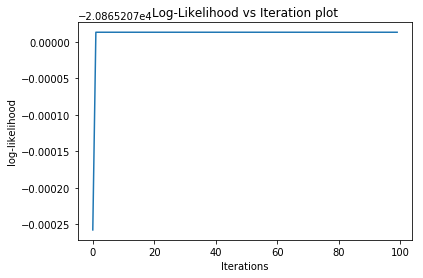

***First Cluster Done***


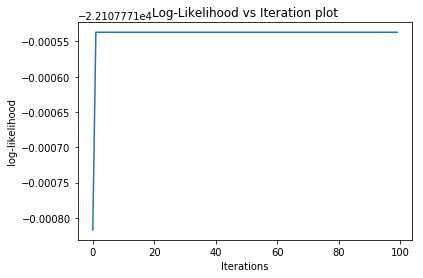

***Second Cluster Done***


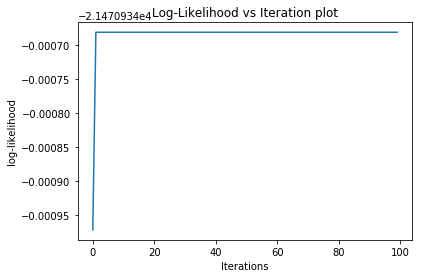

  1% (30 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:08

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:02:23 Time:  0:02:23

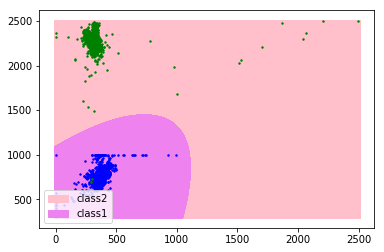

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:56 Time:  0:01:56

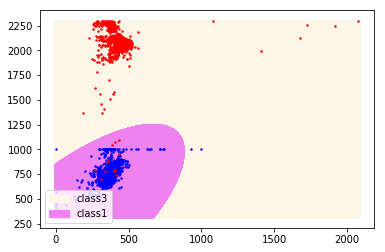

  2% (57 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:08

Confusion Matrix
[[621.   1.]
 [  2. 571.]]
Accuracy:  [0.99748954 0.99748954]
Precision:  [0.99678973 0.99825175]
Recall:  [0.99839228 0.9965096 ]
F-Measure:  [0.99759036 0.99737991]
Mean F-Measure:  0.9974851370546023
Mean F-Measure:  0.9974851370546023
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:56 Time:  0:01:56

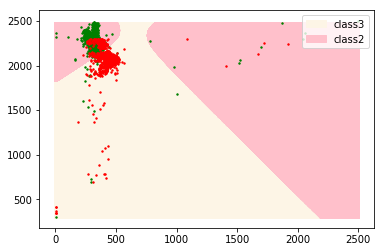

  1% (47 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:09

Confusion Matrix
[[581.  16.]
 [122. 451.]]
Accuracy:  [0.88205128 0.88205128]
Precision:  [0.82645804 0.96573876]
Recall:  [0.97319933 0.78708551]
F-Measure:  [0.89384615 0.86730769]
Mean F-Measure:  0.8805769230767919
Mean F-Measure:  0.8805769230767919


100% (5521618 of 5521618) |##############| Elapsed Time: 0:03:01 Time:  0:03:01

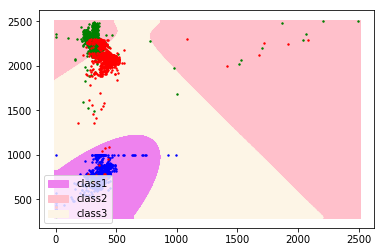

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.21e+02 1.00e-10 1.00e+00]
 [1.00e-10 5.81e+02 1.60e+01]
 [2.00e+00 1.22e+02 4.49e+02]]
Accuracy:  [0.99832589 0.92299107 0.92131696]
Precision:  [0.99678973 0.82645804 0.96351931]
Recall:  [0.99839228 0.97319933 0.78359511]
F-Measure:  [0.99759036 0.89384615 0.86429259]
Mean F-Measure:  0.9185763681063208
1**done
2**done
3**done


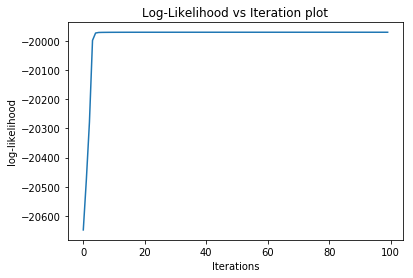

***First Cluster Done***


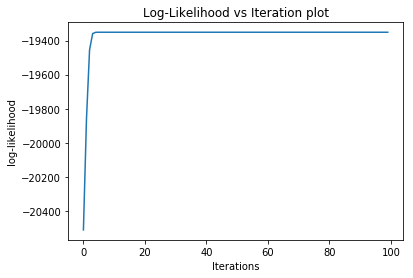

***Second Cluster Done***


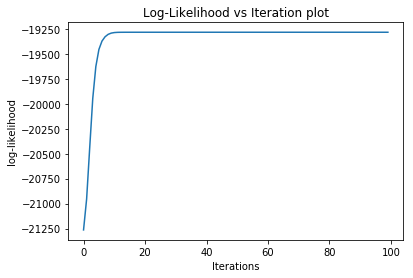

  1% (27 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:18

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:02:17 Time:  0:02:17

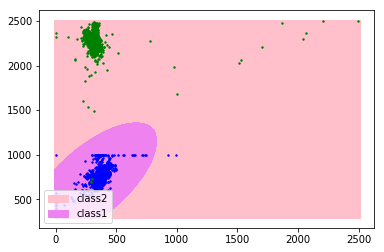

  3% (80 of 2085) |                      | Elapsed Time: 0:00:00 ETA:   0:00:06

Confusion Matrix
[[6.21e+02 1.00e+00]
 [1.00e-10 5.97e+02]]
Accuracy:  [0.99917966 0.99917966]
Precision:  [1.         0.99832776]
Recall:  [0.99839228 1.        ]
F-Measure:  [0.99919549 0.99916318]
Mean F-Measure:  0.9991793373433531
Mean F-Measure:  0.9991793373433531
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:36 Time:  0:01:36

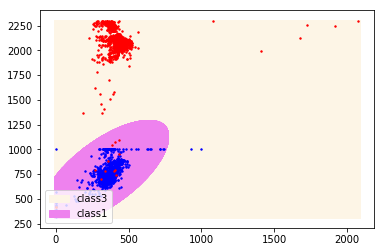

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:06

Confusion Matrix
[[621.   1.]
 [  2. 571.]]
Accuracy:  [0.99748954 0.99748954]
Precision:  [0.99678973 0.99825175]
Recall:  [0.99839228 0.9965096 ]
F-Measure:  [0.99759036 0.99737991]
Mean F-Measure:  0.9974851370546023
Mean F-Measure:  0.9974851370546023
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:46 Time:  0:01:46

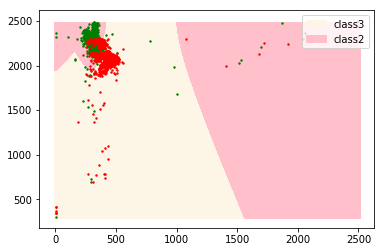

  2% (60 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:07

Confusion Matrix
[[570.  27.]
 [ 41. 532.]]
Accuracy:  [0.94188034 0.94188034]
Precision:  [0.93289689 0.95169946]
Recall:  [0.95477387 0.92844677]
F-Measure:  [0.94370861 0.93992933]
Mean F-Measure:  0.9418189689465644
Mean F-Measure:  0.9418189689465644


100% (5521618 of 5521618) |##############| Elapsed Time: 0:02:57 Time:  0:02:57

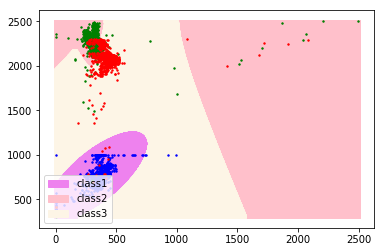

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.21e+02 1.00e-10 1.00e+00]
 [1.00e-10 5.70e+02 2.70e+01]
 [2.00e+00 4.10e+01 5.30e+02]]
Accuracy:  [0.99832589 0.96205357 0.96037946]
Precision:  [0.99678973 0.93289689 0.94982079]
Recall:  [0.99839228 0.95477387 0.92495637]
F-Measure:  [0.99759036 0.94370861 0.9372237 ]
Mean F-Measure:  0.9595075555202492
1**done
2**done
3**done


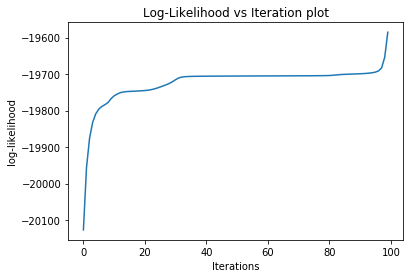

***First Cluster Done***


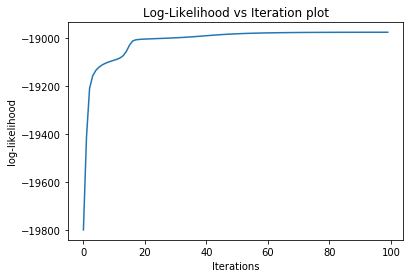

***Second Cluster Done***


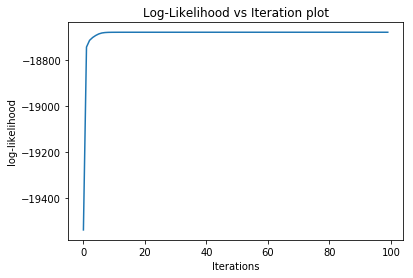

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:06

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:02:08 Time:  0:02:08

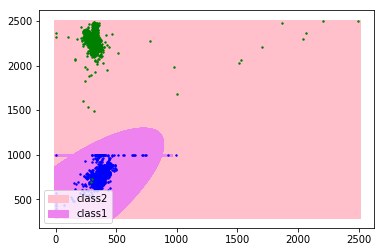

  5% (106 of 2085) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:04

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:02 Time:  0:01:02

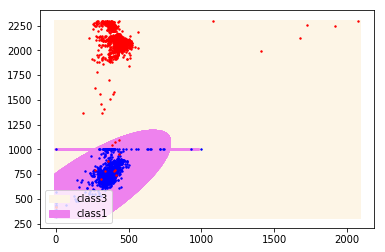

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

Confusion Matrix
[[6.22e+02 1.00e-10]
 [2.00e+00 5.71e+02]]
Accuracy:  [0.99832636 0.99832636]
Precision:  [0.99679487 1.        ]
Recall:  [1.        0.9965096]
F-Measure:  [0.99839486 0.99825175]
Mean F-Measure:  0.9983233059074084
Mean F-Measure:  0.9983233059074084
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:14 Time:  0:01:14

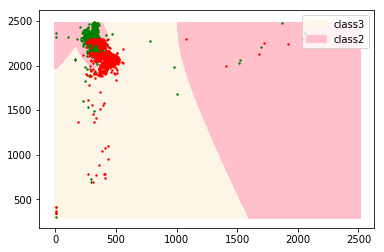

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

Confusion Matrix
[[575.  22.]
 [ 37. 536.]]
Accuracy:  [0.94957265 0.94957265]
Precision:  [0.93954248 0.96057348]
Recall:  [0.96314908 0.93542757]
F-Measure:  [0.95119934 0.94783378]
Mean F-Measure:  0.9495165568578934
Mean F-Measure:  0.9495165568578934


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:37 Time:  0:01:37

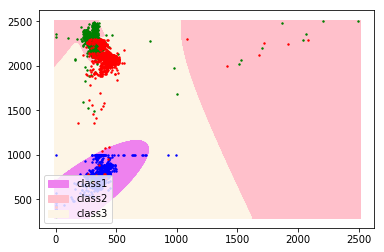

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.22e+02 1.00e-10 1.00e-10]
 [1.00e-10 5.75e+02 2.20e+01]
 [2.00e+00 3.70e+01 5.34e+02]]
Accuracy:  [0.99888393 0.96707589 0.96595982]
Precision:  [0.99679487 0.93954248 0.96043165]
Recall:  [1.         0.96314908 0.93193717]
F-Measure:  [0.99839486 0.95119934 0.94596988]
Mean F-Measure:  0.9651880289041387
1**done
2**done
3**done


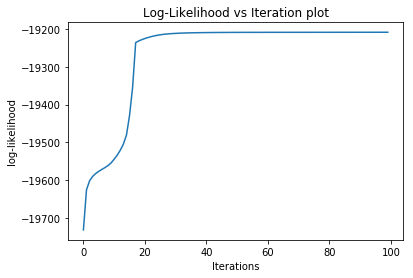

***First Cluster Done***


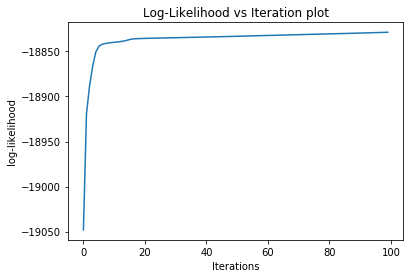

***Second Cluster Done***


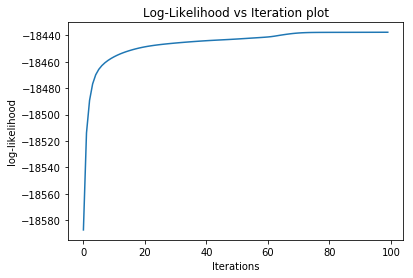

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:25 Time:  0:01:25

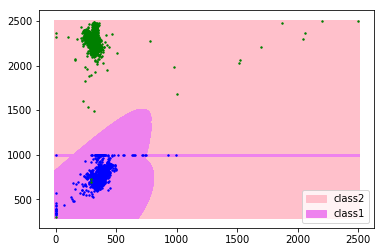

  5% (106 of 2085) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:03

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:04 Time:  0:01:04

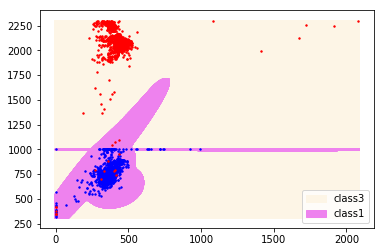

  5% (127 of 2503) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:04

Confusion Matrix
[[6.22e+02 1.00e-10]
 [2.00e+00 5.71e+02]]
Accuracy:  [0.99832636 0.99832636]
Precision:  [0.99679487 1.        ]
Recall:  [1.        0.9965096]
F-Measure:  [0.99839486 0.99825175]
Mean F-Measure:  0.9983233059074084
Mean F-Measure:  0.9983233059074084
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:15 Time:  0:01:15

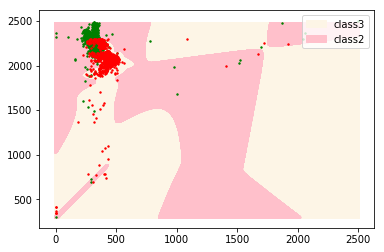

  5% (127 of 2503) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:04

Confusion Matrix
[[567.  30.]
 [ 32. 541.]]
Accuracy:  [0.94700855 0.94700855]
Precision:  [0.94657763 0.9474606 ]
Recall:  [0.94974874 0.94415358]
F-Measure:  [0.94816054 0.9458042 ]
Mean F-Measure:  0.9469823654604734
Mean F-Measure:  0.9469823654604734


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:52 Time:  0:01:52

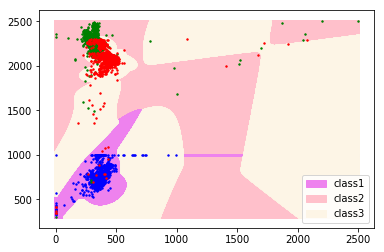

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.22e+02 1.00e-10 1.00e-10]
 [1.00e-10 5.67e+02 3.00e+01]
 [2.00e+00 3.20e+01 5.39e+02]]
Accuracy:  [0.99888393 0.96540179 0.96428571]
Precision:  [0.99679487 0.94657763 0.94727592]
Recall:  [1.         0.94974874 0.94066318]
F-Measure:  [0.99839486 0.94816054 0.94395797]
Mean F-Measure:  0.9635044557186224
1**done
2**done
3**done


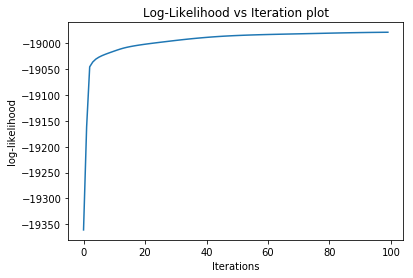

***First Cluster Done***


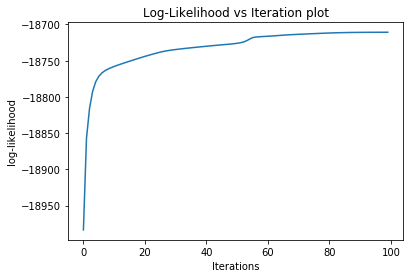

***Second Cluster Done***


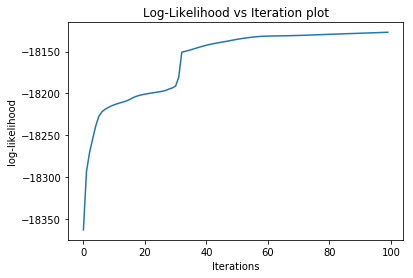

  5% (127 of 2503) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:04

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:21:01 Time:  0:21:01

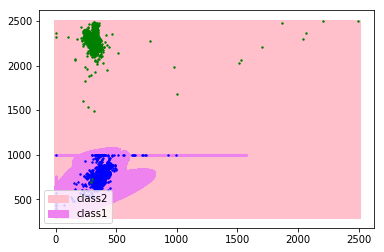

  5% (106 of 2085) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:03

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:05 Time:  0:01:05

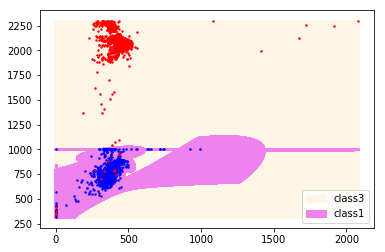

Confusion Matrix
[[619.   3.]
 [  1. 572.]]
Accuracy:  [0.99665272 0.99665272]
Precision:  [0.9983871  0.99478261]
Recall:  [0.99517685 0.9982548 ]
F-Measure:  [0.99677939 0.99651568]
Mean F-Measure:  0.9966475337629557
Mean F-Measure:  0.9966475337629557
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:03 Time:  0:01:03

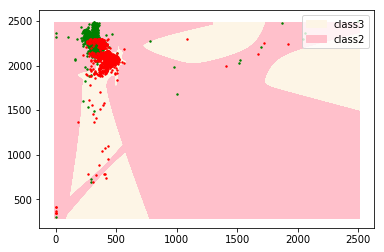

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

Confusion Matrix
[[575.  22.]
 [ 38. 535.]]
Accuracy:  [0.94871795 0.94871795]
Precision:  [0.93800979 0.96050269]
Recall:  [0.96314908 0.93368237]
F-Measure:  [0.95041322 0.94690265]
Mean F-Measure:  0.9486579390037226
Mean F-Measure:  0.9486579390037226


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:41 Time:  0:01:41

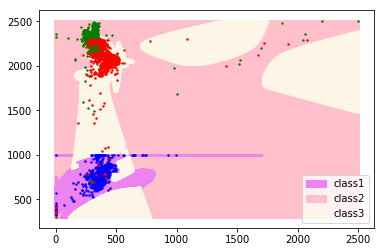

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.22e+02 1.00e-10 1.00e-10]
 [1.00e-10 5.75e+02 2.20e+01]
 [1.00e+00 3.80e+01 5.34e+02]]
Accuracy:  [0.99944196 0.96651786 0.96595982]
Precision:  [0.99839486 0.93800979 0.96043165]
Recall:  [1.         0.96314908 0.93193717]
F-Measure:  [0.99919679 0.95041322 0.94596988]
Mean F-Measure:  0.9651932983806636
1**done
2**done
3**done


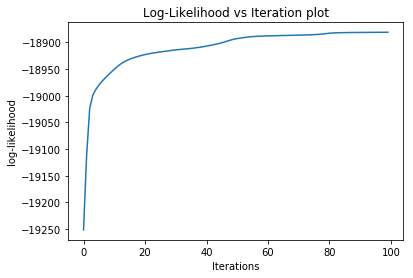

***First Cluster Done***


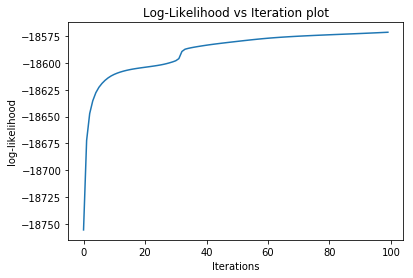

***Second Cluster Done***


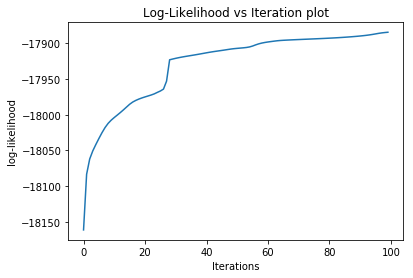

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:22 Time:  0:01:22

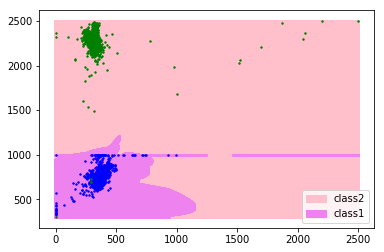

  3% (80 of 2085) |                      | Elapsed Time: 0:00:00 ETA:   0:00:03

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:02 Time:  0:01:02

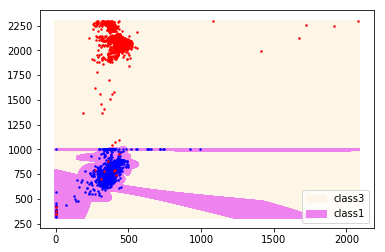

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:06

Confusion Matrix
[[615.   7.]
 [  1. 572.]]
Accuracy:  [0.99330544 0.99330544]
Precision:  [0.99837662 0.98791019]
Recall:  [0.98874598 0.9982548 ]
F-Measure:  [0.99353796 0.99305556]
Mean F-Measure:  0.9932967600070146
Mean F-Measure:  0.9932967600070146
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:11 Time:  0:01:11

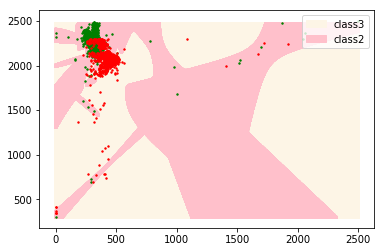

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

Confusion Matrix
[[571.  26.]
 [ 26. 547.]]
Accuracy:  [0.95555556 0.95555556]
Precision:  [0.95644891 0.95462478]
Recall:  [0.95644891 0.95462478]
F-Measure:  [0.95644891 0.95462478]
Mean F-Measure:  0.9555368465361908
Mean F-Measure:  0.9555368465361908


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:48 Time:  0:01:48

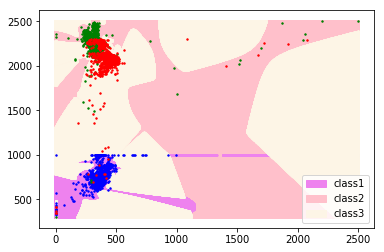

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.15e+02 1.00e-10 7.00e+00]
 [1.00e-10 5.71e+02 2.60e+01]
 [1.00e+00 2.60e+01 5.46e+02]]
Accuracy:  [0.99553571 0.97098214 0.96651786]
Precision:  [0.99837662 0.95644891 0.94300518]
Recall:  [0.98874598 0.95644891 0.95287958]
F-Measure:  [0.99353796 0.95644891 0.94791667]
Mean F-Measure:  0.9659678474490995
1**done
2**done
3**done


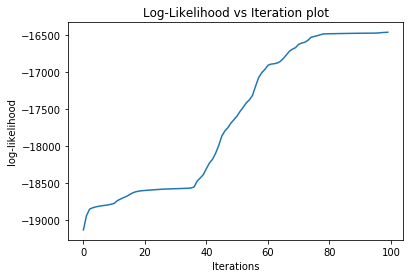

***First Cluster Done***


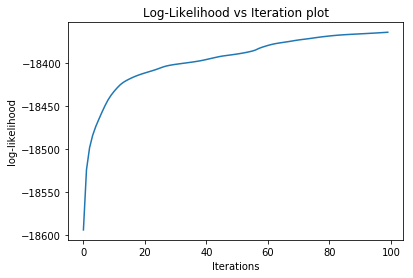

***Second Cluster Done***


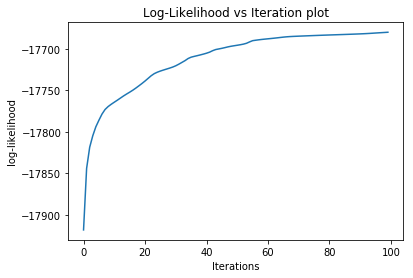

  2% (64 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

***Third Cluster Done***
-1.09375 2501.09375 299.6875 2505.0


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:21 Time:  0:01:21

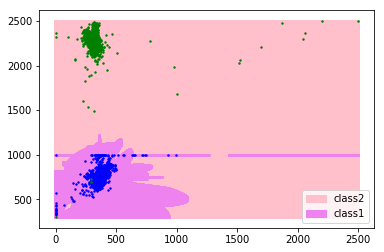

  5% (106 of 2085) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:03

Confusion Matrix
[[6.22e+02 1.00e-10]
 [1.00e-10 5.97e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999998358
Mean F-Measure:  0.9999999999998358
-1.09375 2083.125 315.3125 2301.875


100% (4142895 of 4142895) |##############| Elapsed Time: 0:01:02 Time:  0:01:02

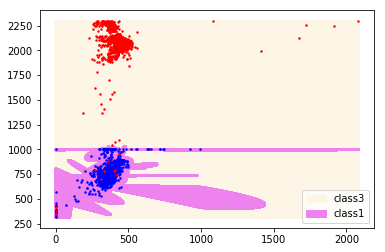

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

Confusion Matrix
[[615.   7.]
 [  1. 572.]]
Accuracy:  [0.99330544 0.99330544]
Precision:  [0.99837662 0.98791019]
Recall:  [0.98874598 0.9982548 ]
F-Measure:  [0.99353796 0.99305556]
Mean F-Measure:  0.9932967600070146
Mean F-Measure:  0.9932967600070146
-1.09375 2501.09375 299.6875 2481.5625


100% (5461546 of 5461546) |##############| Elapsed Time: 0:01:15 Time:  0:01:15

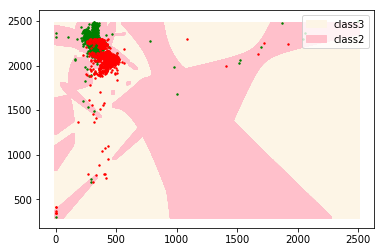

  3% (96 of 2503) |                      | Elapsed Time: 0:00:00 ETA:   0:00:06

Confusion Matrix
[[572.  25.]
 [ 33. 540.]]
Accuracy:  [0.95042735 0.95042735]
Precision:  [0.94545455 0.95575221]
Recall:  [0.95812395 0.94240838]
F-Measure:  [0.95174709 0.94903339]
Mean F-Measure:  0.9503902400508446
Mean F-Measure:  0.9503902400508446


100% (5521618 of 5521618) |##############| Elapsed Time: 0:01:41 Time:  0:01:41

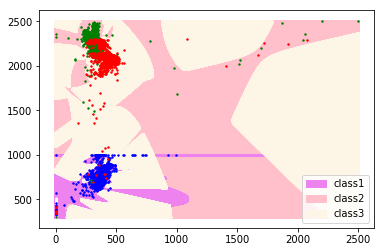

100% (573 of 573) |######################| Elapsed Time: 0:00:00 Time:  0:00:00

[[6.15e+02 1.00e-10 7.00e+00]
 [1.00e-10 5.72e+02 2.50e+01]
 [1.00e+00 3.30e+01 5.39e+02]]
Accuracy:  [0.99553571 0.96763393 0.96316964]
Precision:  [0.99837662 0.94545455 0.94395797]
Recall:  [0.98874598 0.95812395 0.94066318]
F-Measure:  [0.99353796 0.95174709 0.94230769]
Mean F-Measure:  0.9625309149839681


In [22]:
def main():
    train1, train2, train3, test1, test2, test3 = load_data()
    K = [1,2,4,8,16,32,64]
    dims = 2
        
    for k in K:
        mean, cluster1 = kmeans(train1,k,dims)
        print('1**done')
        mean, cluster2 = kmeans(train2,k, dims)
        print('2**done')
        mean, cluster3 = kmeans(train3,k, dims)
        print('3**done')
        
        mu1, cov1, pi1, gamma = gmm(cluster1, train1, k, dims)
        print('***First Cluster Done***')
        mu2, cov2, pi2, gamma = gmm(cluster2, train2, k, dims)
        print('***Second Cluster Done***')
        mu3, cov3, pi3, gamma = gmm(cluster3, train3, k, dims)
        print('***Third Cluster Done***')
        
        pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, 1, 2,k)
        pair_plot(test1, test3, train1, train3, mu1, cov1, pi1, mu3, cov3, pi3, 1, 3,k)
        pair_plot(test2, test3, train2, train3, mu2, cov2, pi2, mu3, cov3, pi3, 2, 3,k)
        
     
        total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, 
                   pi2, mu3, cov3, pi3,k)
        
        
if(__name__=="__main__"):    
    main()

        
    